# Importamos las librerias necesarias 

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , roc_curve, roc_auc_score, auc, classification_report

# Data Frame a utilizar 

In [161]:
# Carga datos de dataset
# Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección 
# y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
# tras observar los datos del día de hoy, el objetivo es predecir las variables target:
# -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
# -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

# Análisis descriptivo de los datos

In [162]:
### Vista de datos
df.head()
df.tail()
print("Tamaño: "+str(df.shape))

# Borramos columna de índices porque no la necesitamos, y además, tiene faltantes.
df.drop(df.columns[0], axis=1, inplace=True)
df.tail()

Tamaño: (145412, 25)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
145407,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0
145411,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,0.0


In [163]:
# Columnas del dataframe
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [164]:
# Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
tipos_de_datos = df.dtypes

variables_categoricas = tipos_de_datos[df.dtypes == 'object'].index
variables_numericas = tipos_de_datos[df.dtypes != 'object'].index

print("Variables Categóricas:")
print(variables_categoricas)
print("\nVariables Numéricas:")
print(variables_numericas)

Variables Categóricas:
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

Variables Numéricas:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow'],
      dtype='object')


**Significado de las variables categóricas**

Date [String]: fecha de la muestra, expresada en AAAA-MM-DD.

Location [String]: ciudad donde se toma la muestra.

WindGustDir [String]: dirección desde la cual se registró la ráfaga de viento más fuerte.

WindDir9am [String]: dirección del viento a las 9am.

WindDir3pm [String]: dirección del viento a las 3pm.

RainToday [String]: indica si llovió ese día.

RainTomorrow [String] (OBJ): predice si lloverá al día siguiente.

In [165]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [166]:
# Valores que asumen las variables categóricas.
print(df['Location'].unique())
print(df['WindGustDir'].unique())
print(df['WindDir9am'].unique())
print(df['WindDir3pm'].unique())
print(df['RainToday'].unique())
print(df['RainTomorrow'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
['No' 'Yes' nan]
['No' 'Yes' nan]


**Significado de las variables numéricas**

-MinTemp: temperatura mínima registrada en ese día, en °C.

-MaxTemp: temperatura máxima registrada en ese día, en °C.

-Rainfall: cantidad de lluvia registrada ese día, en mm.

-Evaporation: cantidad de agua evaporada durante ese día, en mm.

-Sunshine: cantidad de horas de sol durante ese día.

-WindGustSpeed: velocidad máxima del viento registrada ese día, en km/h.

-WindSpeed9am: velocidad del viento registrada ese día a las 9am, en km/h.

-WindSpeed3pm: velocidad del viento registrada ese día a las 3pm, en km/h.

-Humidity9am: porcentaje de humedad en el aire a las 9am.

-Humidity3pm: porcentaje de humedad en el aire a las 3pm.

-Pressure9am: presión atmosférica registrada a las 9am, en hPa.

-Pressure3pm: presión atmosférica registrada a las 3pm, en hPa.

-Cloud9am: variable sin unidad, representando la cantidad de nubes registrada a las 9am.

-Cloud3pm: variable sin unidad, representando la cantidad de nubes registrada a las 3pm.

-Temp9am: temperatura registrada a las 9am, en °C.

-Temp3pm: temperatura registrada a las 3pm, en °C.

-RainfallTomorrow (OBJ): cantidad de lluvia registrada al día siguiente, en mm.

In [167]:
# Ejecutamos algunos comandos para deducir las unidades de arriba.
df_filtered = df[df['Rainfall'] != 0]
promedio = df_filtered['Rainfall'].mean()
mediana = df_filtered['Rainfall'].median()
print("Promedio de 'Rainfall' después de filtrar los valores 0:", promedio)
print("Mediana de 'Rainfall' después de filtrar los valores 0:", mediana)

Promedio de 'Rainfall' después de filtrar los valores 0: 6.5682012952708915
Mediana de 'Rainfall' después de filtrar los valores 0: 2.2


In [168]:
# A continuación se muestran algunos datos de cada columna, como la cantidad de datos, media, desvío, cuartiles
# Solo sobre variables numéricas
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


En esta tabla podemos ver:
- count: cantidad todal de datos
- mean: media/promedio
- std: desvio estándar
- min: valor mínimo de los datos
- máx: valor máximo de los datos
- 25%: es el primer cuartil
- 50%: es el segundo cuartil o mediana
- 75% es el tercer cuartil
- max: es el valor máximo de los datos

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              145412 non-null  object 
 1   Location          145412 non-null  object 
 2   MinTemp           143928 non-null  float64
 3   MaxTemp           144159 non-null  float64
 4   Rainfall          142152 non-null  float64
 5   Evaporation       82658 non-null   float64
 6   Sunshine          75616 non-null   float64
 7   WindGustDir       135096 non-null  object 
 8   WindGustSpeed     135159 non-null  float64
 9   WindDir9am        134850 non-null  object 
 10  WindDir3pm        141186 non-null  object 
 11  WindSpeed9am      143645 non-null  float64
 12  WindSpeed3pm      142351 non-null  float64
 13  Humidity9am       142759 non-null  float64
 14  Humidity3pm       140907 non-null  float64
 15  Pressure9am       130351 non-null  float64
 16  Pressure3pm       13

In [170]:
# De todas las ciudades que contiene el dataset solo nos quedamos con las filas que contienen las ciudad que nos interesan
# Ciudades de interés: Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport.

#Nos quemos con los datos de las locations que nos interesan
ciudades_deseadas = ['Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport']

# Filtrar el DataFrame para mantener solo las filas con las ciudades deseadas
df = df[df['Location'].isin(ciudades_deseadas)]
print("Nuevo tamaño: "+str(df.shape))

Nuevo tamaño: (28233, 24)


In [171]:
#¿Cuántos datos hay de cada ciudad?
#Esto lo podríamos ordenar de ponerlo arriba donde estan los gráficos de la cantidad de datos por ciudad (gráfico violeta)
data_country= df.value_counts('Location')
print(data_country)

Location
Canberra            3435
Sydney              3343
Adelaide            3192
Melbourne           3192
MountGambier        3039
Cobar               3008
Dartmoor            3008
MelbourneAirport    3008
SydneyAirport       3008
Name: count, dtype: int64


# Valores atípicos y faltanes

In [172]:
# Cantidad de valores faltantes.
print(df.isna().sum())

# Veremos cómo completar las temperaturas:
#print(df[df['MinTemp'].isnull() & df['MaxTemp'].isnull() & df['Temp9am'].isnull() & df['Temp3pm'].isnull()])

# Vemos que cuando una temperatura es nula, casi siempre todas son nulas, así que no podemos usar uno de esos 
# datos para completar. Cambiemos de estrategia.


Date                   0
Location               0
MinTemp              570
MaxTemp              558
Rainfall             986
Evaporation         4353
Sunshine            6713
WindGustDir         1645
WindGustSpeed       1642
WindDir9am          1648
WindDir3pm           437
WindSpeed9am         358
WindSpeed3pm         340
Humidity9am          940
Humidity3pm          890
Pressure9am          839
Pressure3pm          829
Cloud9am            9367
Cloud3pm            9550
Temp9am              585
Temp3pm              576
RainToday            986
RainTomorrow         985
RainfallTomorrow     985
dtype: int64


In [173]:
# Bajemos estos porcentajes
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

   Nombre de columna  Porcentaje de nulos
0               Date                 0.00
1           Location                 0.00
2            MinTemp                 2.02
3            MaxTemp                 1.98
4           Rainfall                 3.49
5        Evaporation                15.42
6           Sunshine                23.78
7        WindGustDir                 5.83
8      WindGustSpeed                 5.82
9         WindDir9am                 5.84
10        WindDir3pm                 1.55
11      WindSpeed9am                 1.27
12      WindSpeed3pm                 1.20
13       Humidity9am                 3.33
14       Humidity3pm                 3.15
15       Pressure9am                 2.97
16       Pressure3pm                 2.94
17          Cloud9am                33.18
18          Cloud3pm                33.83
19           Temp9am                 2.07
20           Temp3pm                 2.04
21         RainToday                 3.49
22      RainTomorrow              

<Axes: >

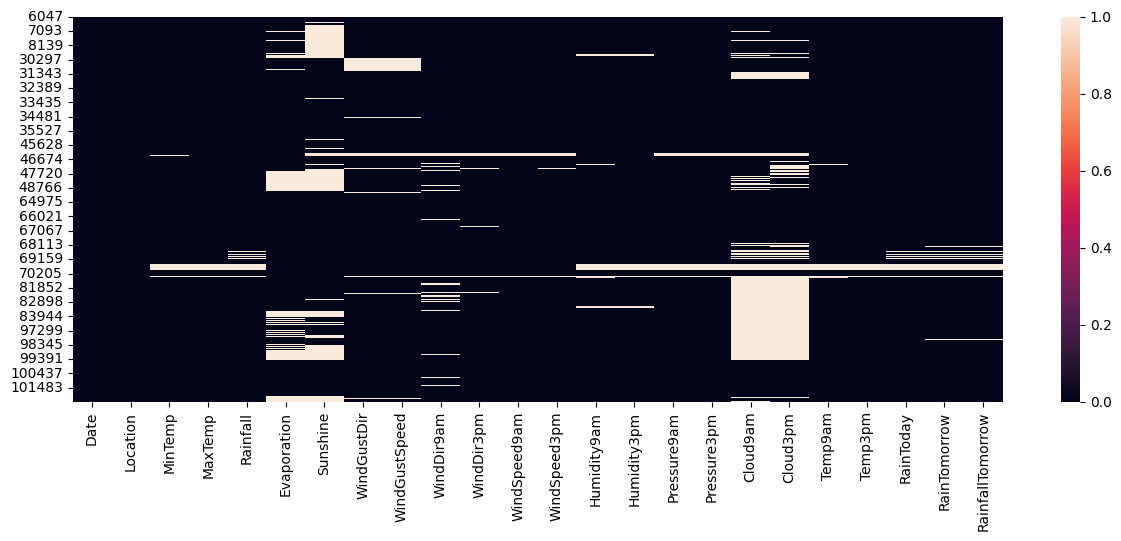

In [174]:
# Visualización de los nulos en una sección del dataframe
fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())

In [175]:
#Cantidad de nulos por Location
#Contamos la cantidad de valores nulos en cada Location y crea un nuevo DataFrame 
#En el nuevo DataFrame contine la Location y el total de valores nulos ("Total_Nulos") para cada grupo de ubicación en el DataFrame original
null_counts_country = df.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')
print(null_counts_country)

           Location  Total_Nulos
0          Adelaide        10091
1          Canberra         8375
2             Cobar         4057
3          Dartmoor         8909
4         Melbourne         9126
5  MelbourneAirport          106
6      MountGambier         1373
7            Sydney         3525
8     SydneyAirport          220


In [176]:
# Vamos a fusionar Sydney y Melbourne con sus aeropuertos, considerando que esto va a reducir signifiicativamente los datos nulos.
df = df.sort_values(by='Date', ignore_index=True)
df_Sydney = df[(df["Location"]=="Sydney")]
df_aSydney = df[(df["Location"]=="SydneyAirport")]
df_Melbourne = df[(df["Location"]=="Melbourne")]
df_AMelbourne = df[(df["Location"]=="MelbourneAirport")]

# Hacemos un join outer sobre "Date" para mantener todos los registros
df_s = df_Sydney.merge(df_aSydney, on='Date', how='outer', suffixes=('', '_ASydney'))
df_m = df_Melbourne.merge(df_AMelbourne, on='Date', how='outer', suffixes=('', '_AMelbourne'))

# Eliminamos la columna Location_Aeropuerto que no necesitamos, y llenamos las vacías con lo que corresponda para cada ciudad
# (en caso de que el registro haya existido en el aeropuerto, y no en la ciudad)
df_s.drop("Location_ASydney", axis=1, inplace=True)
df_m.drop("Location_AMelbourne", axis=1, inplace=True)
df_s["Location"] = "Sydney"
df_m["Location"] = "Melbourne"

In [177]:
# Generamos una lista de columnas numéricas y categóricas que tiene sentido ser completadas con los valores de los aeropuertos.
columnas_numericas = ['MinTemp', 'MaxTemp','Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm', "Rainfall", 'RainfallTomorrow', "WindGustSpeed","WindSpeed9am","WindSpeed3pm"]
columnas_categoricas = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


# Completamos nulos para esas columnas, y a su vez las eliminamos
for columna in columnas_numericas+columnas_categoricas:
    columna_as = columna+"_ASydney"
    columna_am = columna+"_AMelbourne"
    df_s[columna] = df_s[columna].fillna(df_s[columna_as])
    df_m[columna] = df_m[columna].fillna(df_m[columna_am])
    df_s.drop(columna_as, axis=1, inplace=True)
    df_m.drop(columna_am, axis=1, inplace=True)


# Chequeemos que no rompimos nada a nivel columnas
print(df_m.shape[1] == df_s.shape[1])
print(df.shape[1] == df_s.shape[1])
#print(df_m.head())

print("Tamaño pre-mergeo: "+str(df.shape))
# Generemos el nuevo dataframe
df_without_sydney_melbourne = df[(df["Location"]!="Sydney")&(df["Location"]!="SydneyAirport")&(df["Location"]!="Melbourne")&(df["Location"]!="MelbourneAirport")]
df = pd.concat([df_without_sydney_melbourne, df_s, df_m], ignore_index=True)
print("Tamaño post-mergeo: "+str(df.shape))

# Mejoramos un poco los porcentajes
porcentaje_nulos_2 = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas_2 = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres_2 = pd.DataFrame({'Nombre de columna': porcentaje_nulos_2.index, 'Porcentaje de nulos': porcentaje_nulos_2.values})
print("Pre mergeo: ")
print(porcentaje_nulos_con_nombres)
print("Post mergeo: ")
print(porcentaje_nulos_con_nombres_2)


True
True
Tamaño pre-mergeo: (28233, 24)
Tamaño post-mergeo: (22217, 24)
Pre mergeo: 
   Nombre de columna  Porcentaje de nulos
0               Date                 0.00
1           Location                 0.00
2            MinTemp                 2.02
3            MaxTemp                 1.98
4           Rainfall                 3.49
5        Evaporation                15.42
6           Sunshine                23.78
7        WindGustDir                 5.83
8      WindGustSpeed                 5.82
9         WindDir9am                 5.84
10        WindDir3pm                 1.55
11      WindSpeed9am                 1.27
12      WindSpeed3pm                 1.20
13       Humidity9am                 3.33
14       Humidity3pm                 3.15
15       Pressure9am                 2.97
16       Pressure3pm                 2.94
17          Cloud9am                33.18
18          Cloud3pm                33.83
19           Temp9am                 2.07
20           Temp3pm            

# Transformación de variables categóricas

In [178]:
# Veamos sobre cuál hacer one hot encoding
columnas_object = df.select_dtypes(include=['object'])
print(columnas_object)

             Date   Location WindGustDir WindDir9am WindDir3pm RainToday  \
0      2007-11-01   Canberra          NW         SW         NW        No   
1      2007-11-02   Canberra         ENE          E          W       Yes   
2      2007-11-03   Canberra          NW          N        NNE       Yes   
3      2007-11-04   Canberra          NW        WNW          W       Yes   
4      2007-11-05   Canberra         SSE        SSE        ESE       Yes   
...           ...        ...         ...        ...        ...       ...   
22212  2017-06-20  Melbourne           N        NNE          N        No   
22213  2017-06-21  Melbourne         NNW          W          S        No   
22214  2017-06-22  Melbourne           N        NNE          N        No   
22215  2017-06-23  Melbourne         NNW          N          N        No   
22216  2017-06-24  Melbourne          SW        WNW          S       Yes   

      RainTomorrow  
0              Yes  
1              Yes  
2              Yes  
3  

In [179]:
# Elegimos estas:
palabrasObject = ["Location",  "RainToday", "RainTomorrow"]
df = pd.get_dummies(df, columns = palabrasObject, drop_first=True, dtype=int)
print(df)

             Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2007-11-01      8.0     24.3       0.0          3.4       6.3   
1      2007-11-02     14.0     26.9       3.6          4.4       9.7   
2      2007-11-03     13.7     23.4       3.6          5.8       3.3   
3      2007-11-04     13.3     15.5      39.8          7.2       9.1   
4      2007-11-05      7.6     16.1       2.8          5.6      10.6   
...           ...      ...      ...       ...          ...       ...   
22212  2017-06-20      6.4     15.8       0.0          2.4       8.8   
22213  2017-06-21      7.8     13.5       0.6          0.6       0.0   
22214  2017-06-22      6.7     14.1       0.2          0.6       0.0   
22215  2017-06-23      7.4     14.9       0.0          1.6       6.0   
22216  2017-06-24      8.3     12.3       1.4          1.8       5.6   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Temp3pm  \
0              NW           30.0         SW         NW  ...    

In [180]:
# Si imaginamos los puntos cardinales sobre un eje cartesiano, podemos codificar cada punto como un ángulo (polar).
# Codifiquemos: ["WindGustDir", "WindDir9am", "WindDir3pm"]
gust = list(df["WindGustDir"].unique())
am = list(df["WindDir9am"].unique())
pm = list(df["WindDir3pm"].unique())

values = ['NW', 'ENE', 'SSE', 'SE', 'E', 'S', 'N', 'WNW', 'ESE', 'NE', 'NNE', 'NNW', 'SW', 'W', 'WSW', 'SSW']
codes = [315, 67.5, 157.5, 135, 90, 180, 0, 292.5, 112.5, 45, 22.5, 337.5, 225, 270, 247.5, 202.5]
wind_coded = pd.DataFrame({'value': values, 'code': codes})

# Reemplazar los valores originales por los codificados
for columna in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df[columna] = df[columna].replace(dict(zip(wind_coded['value'], wind_coded['code'])))

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   22217 non-null  object 
 1   MinTemp                22132 non-null  float64
 2   MaxTemp                22142 non-null  float64
 3   Rainfall               22000 non-null  float64
 4   Evaporation            17913 non-null  float64
 5   Sunshine               15521 non-null  float64
 6   WindGustDir            21316 non-null  float64
 7   WindGustSpeed          21319 non-null  float64
 8   WindDir9am             20678 non-null  float64
 9   WindDir3pm             21830 non-null  float64
 10  WindSpeed9am           21889 non-null  float64
 11  WindSpeed3pm           21900 non-null  float64
 12  Humidity9am            21784 non-null  float64
 13  Humidity3pm            21839 non-null  float64
 14  Pressure9am            21886 non-null  float64
 15  Pr

In [181]:
"""
# Transformemos las fechas
df['Date'] = pd.to_datetime(df['Date'])
df['Ano'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Dia'] = df['Date'].dt.day
df['Dia_Semana'] = df['Date'].dt.day_of_week
# Eliminamos la fecha del df
df.drop(columns= "Date", inplace=True, axis= 1)
anios = df.Ano.unique() 
print(f"Cantidad de años que tenemos datos: {len(anios)}. Estos son: {anios}",) """

# Cambiamos de enfoque porque consideramos necesario capturar con los datos "lo cíclico" de un año y los patrones
# propios de las estaciones del año.

# Convertimos la columna 'fecha' al tipo datetime si aún no lo está
df['Date'] = pd.to_datetime(df['Date'])

# Extraemos el día del año (1 a 365)
df['dia'] = df['Date'].dt.dayofyear

# Calculamos la característica trigonométrica (solo el seno)
df['dia'] = np.sin(2 * np.pi * df['dia'] / 365)

# Agregamos el año como una característica adicional
df['año'] = df['Date'].dt.year

df.drop("Date", axis=1, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                22132 non-null  float64
 1   MaxTemp                22142 non-null  float64
 2   Rainfall               22000 non-null  float64
 3   Evaporation            17913 non-null  float64
 4   Sunshine               15521 non-null  float64
 5   WindGustDir            21316 non-null  float64
 6   WindGustSpeed          21319 non-null  float64
 7   WindDir9am             20678 non-null  float64
 8   WindDir3pm             21830 non-null  float64
 9   WindSpeed9am           21889 non-null  float64
 10  WindSpeed3pm           21900 non-null  float64
 11  Humidity9am            21784 non-null  float64
 12  Humidity3pm            21839 non-null  float64
 13  Pressure9am            21886 non-null  float64
 14  Pressure3pm            21893 non-null  float64
 15  Cl

In [182]:
"""
# A continuación creamos una función que busca en el dataset las tempraturas del día anterior y
# del día posterior a este, y sino, del año anterior y posterior,
# y devuelve un promedio del par que corresponda.
#print(df)
def promedio(fech, location, data, columna):
    fecha = pd.to_datetime(fech)
    fecha_anio_anterior = (fecha - pd.DateOffset(years=1)).strftime('%Y-%m-%d')
    fecha_anio_posterior = (fecha + pd.DateOffset(years=1)).strftime('%Y-%m-%d')
    fecha_dia_desp = (fecha + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    fecha_dia_ant = (fecha - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    
    x1 = data[(data['Date'] == fecha_dia_desp) & (data["Location"]==location)][columna]
    x2 = data[(data['Date'] == fecha_dia_ant) & (data["Location"]==location)][columna]
    x3 = data[(data['Date'] == fecha_anio_anterior) & (data["Location"]==location)][columna]
    x4 = data[(data['Date'] == fecha_anio_posterior) & (data["Location"]==location)][columna]

    datos1 = [df.iloc[0] for df in [x1, x2] if df.shape[0] != 0]
    datos2 = [df.iloc[0] for df in [x3, x4] if df.shape[0] != 0]

    # Si no hay dataframes no nulos, devolver None
    if len(datos1) == 0:
        if len(datos2) == 0:
            return None
        else:
            promedio = sum(datos2)/len(datos2)
            return promedio
    else:
        promedio = sum(datos1)/len(datos1)
        return promedio

z = promedio("2009-01-01", "Cobar", df, "MinTemp")
print(z)
"""

'\n# A continuación creamos una función que busca en el dataset las tempraturas del día anterior y\n# del día posterior a este, y sino, del año anterior y posterior,\n# y devuelve un promedio del par que corresponda.\n#print(df)\ndef promedio(fech, location, data, columna):\n    fecha = pd.to_datetime(fech)\n    fecha_anio_anterior = (fecha - pd.DateOffset(years=1)).strftime(\'%Y-%m-%d\')\n    fecha_anio_posterior = (fecha + pd.DateOffset(years=1)).strftime(\'%Y-%m-%d\')\n    fecha_dia_desp = (fecha + pd.DateOffset(days=1)).strftime(\'%Y-%m-%d\')\n    fecha_dia_ant = (fecha - pd.DateOffset(days=1)).strftime(\'%Y-%m-%d\')\n    \n    x1 = data[(data[\'Date\'] == fecha_dia_desp) & (data["Location"]==location)][columna]\n    x2 = data[(data[\'Date\'] == fecha_dia_ant) & (data["Location"]==location)][columna]\n    x3 = data[(data[\'Date\'] == fecha_anio_anterior) & (data["Location"]==location)][columna]\n    x4 = data[(data[\'Date\'] == fecha_anio_posterior) & (data["Location"]==location)][

In [183]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                22132 non-null  float64
 1   MaxTemp                22142 non-null  float64
 2   Rainfall               22000 non-null  float64
 3   Evaporation            17913 non-null  float64
 4   Sunshine               15521 non-null  float64
 5   WindGustDir            21316 non-null  float64
 6   WindGustSpeed          21319 non-null  float64
 7   WindDir9am             20678 non-null  float64
 8   WindDir3pm             21830 non-null  float64
 9   WindSpeed9am           21889 non-null  float64
 10  WindSpeed3pm           21900 non-null  float64
 11  Humidity9am            21784 non-null  float64
 12  Humidity3pm            21839 non-null  float64
 13  Pressure9am            21886 non-null  float64
 14  Pressure3pm            21893 non-null  float64
 15  Cl

        Nombre de columna  Porcentaje de nulos
0                 MinTemp                 0.38
1                 MaxTemp                 0.34
2                Rainfall                 0.98
3             Evaporation                19.37
4                Sunshine                30.14
5             WindGustDir                 4.06
6           WindGustSpeed                 4.04
7              WindDir9am                 6.93
8              WindDir3pm                 1.74
9            WindSpeed9am                 1.48
10           WindSpeed3pm                 1.43
11            Humidity9am                 1.95
12            Humidity3pm                 1.70
13            Pressure9am                 1.49
14            Pressure3pm                 1.46
15               Cloud9am                34.95
16               Cloud3pm                35.47
17                Temp9am                 0.44
18                Temp3pm                 0.39
19       RainfallTomorrow                 0.97
20      Locat

<Axes: >

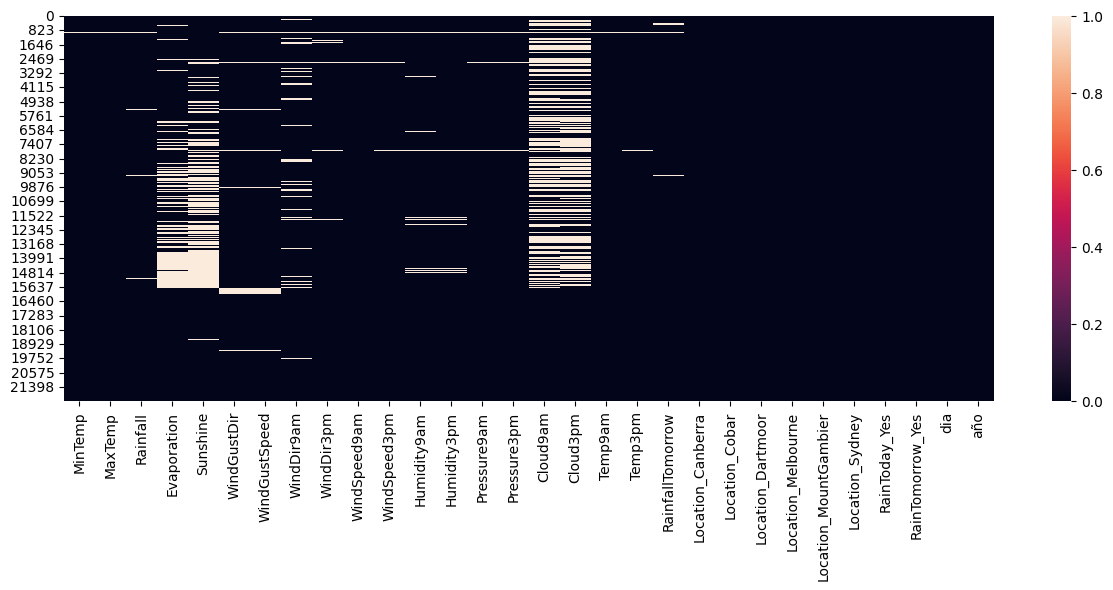

In [184]:
# Porcentajes
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

# Veamos los valores faltantes
fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15852\322506626.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city[variable] = city[variable].fillna(city[variable].shift())
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15852\322506626.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city[variable] = city[variable].fillna(city[variable].shift(-1))


<Axes: >

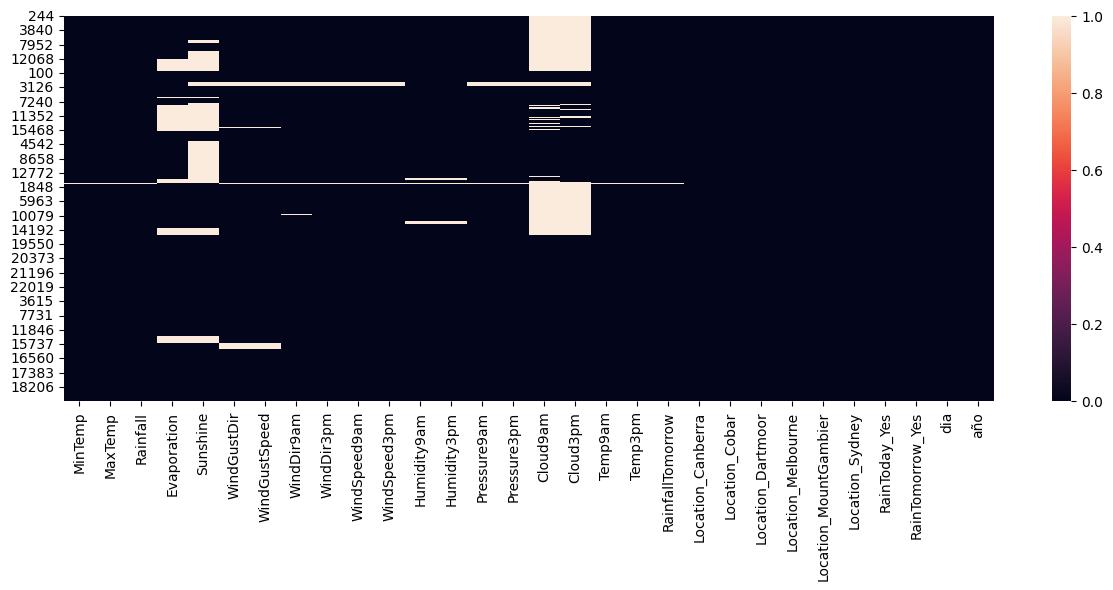

In [185]:
cities = ['Location_Canberra', 'Location_Cobar', 'Location_Dartmoor', 'Location_Melbourne', 'Location_MountGambier', 'Location_Sydney']
df_canberra = df[df["Location_Canberra"]==1]
df_cobar = df[df["Location_Cobar"]==1]
df_dartmoor = df[df["Location_Dartmoor"]==1]
df_melbourne = df[df["Location_Melbourne"]==1]
df_mountgambier = df[df["Location_MountGambier"]==1]
df_sydney = df[df["Location_Sydney"]==1]
df_adelaide = df[(df["Location_Canberra"]==0)&(df["Location_Cobar"]==0)&(df["Location_Dartmoor"]==0)&(df["Location_Melbourne"]==0)&(df["Location_MountGambier"]==0)&(df["Location_Sydney"]==0)]

df_cities = [df_adelaide,df_canberra, df_cobar, df_dartmoor, df_melbourne, df_mountgambier, df_sydney]

for city in df_cities:
    for variable in list(df.columns):
        # Rellenamos los valores nulos con el valor del día anterior/siguiente si existe (pues el df está ordenado por fecha)
        city[variable] = city[variable].fillna(city[variable].shift())
        city[variable] = city[variable].fillna(city[variable].shift(-1))

df = pd.concat(df_cities)

fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())


In [186]:
# Porcentajes finales
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

        Nombre de columna  Porcentaje de nulos
0                 MinTemp                 0.30
1                 MaxTemp                 0.28
2                Rainfall                 0.33
3             Evaporation                14.87
4                Sunshine                29.40
5             WindGustDir                 2.84
6           WindGustSpeed                 2.84
7              WindDir9am                 1.70
8              WindDir3pm                 1.24
9            WindSpeed9am                 1.24
10           WindSpeed3pm                 1.24
11            Humidity9am                 1.51
12            Humidity3pm                 1.50
13            Pressure9am                 1.26
14            Pressure3pm                 1.26
15               Cloud9am                31.18
16               Cloud3pm                31.23
17                Temp9am                 0.29
18                Temp3pm                 0.29
19       RainfallTomorrow                 0.33
20      Locat

In [188]:
# Vamos a completar los restantes con las un promedio entre el promedio y la mediana.

promedio_total = df.mean()
mediana_total = df.median()
promedio_entre_promedio_y_mediana = (promedio_total + mediana_total) / 2

# Crear una lista con este valor repetido tantas veces como columnas haya en el DataFrame
lista_completada = [promedio_entre_promedio_y_mediana] * len(df.columns)

print(lista_completada)

MinTemp                    10.934906
MaxTemp                    21.895802
Rainfall                    1.984808
Evaporation                 4.974680
Sunshine                    6.937494
WindGustDir               180.083391
WindGustSpeed              40.557748
WindDir9am                161.126374
WindDir3pm                188.152545
WindSpeed9am               13.951509
WindSpeed3pm               18.820929
Humidity9am                69.138424
Humidity3pm                49.857202
Pressure9am              1018.288622
Pressure3pm              1016.191170
Cloud9am                    4.725376
Cloud3pm                    4.754353
Temp9am                    15.234235
Temp3pm                    20.417749
RainfallTomorrow            1.983553
Location_Canberra           0.154611
Location_Cobar              0.135392
Location_Dartmoor           0.135392
Location_Melbourne          0.143674
Location_MountGambier       0.136787
Location_Sydney             0.150470
RainToday_Yes               0.235090
R

In [303]:
# Porcentajes finales
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

        Nombre de columna  Porcentaje de nulos
0                 MinTemp                 0.00
1                 MaxTemp                 0.00
2                Rainfall                 0.00
3             Evaporation                11.48
4                Sunshine                24.94
5             WindGustDir                 0.00
6           WindGustSpeed                 0.00
7              WindDir9am                 0.00
8              WindDir3pm                 0.00
9            WindSpeed9am                 0.00
10           WindSpeed3pm                 0.00
11            Humidity9am                 0.00
12            Humidity3pm                 0.00
13            Pressure9am                 0.00
14            Pressure3pm                 0.00
15               Cloud9am                27.91
16               Cloud3pm                27.91
17                Temp9am                 0.00
18                Temp3pm                 0.00
19       RainfallTomorrow                 0.00
20      Locat

# Matriz de Correlación

Con el fin de identificar patrones de correlación en los datos, calculamos dos matrices de corrlación entre todas las columnas del df y las columnas 'RainTomorrow' y 'RainfallTomorrow'.
Vale aclarar que el coeficiente de correlación lo aplicamos entre la columna 'RainfallTomorrow' y las restantes columnas.
En este caso vamos analizar lo siguiente:
- Si el coeficiente de correlación es cercano a 1, indica una correlación positiva fuerte, lo que significa que a medida que una variable aumenta, la otra también tiende a aumentar.
- Si el coeficiente de correlación es cercano a -1, indica una correlación negativa fuerte, lo que significa que a medida que una variable aumenta, la otra tiende a disminuir.
- Si el coeficiente de correlación es cercano a 0, indica que no hay una correlación lineal fuerte entre las dos variables.

In [ ]:
# Matriz de correlación entre todas las columnas y RainTomorrow_Yes
# Eliminamos las columnas que no vamos a predecir con el modelo de regresión
df_regresion = df.drop(columns = ["RainToday_Yes", "RainTomorrow_Yes"], axis= 1)

df_canberra = df[df["Location_Canberra"]==1]
df_cobar = df[(df["Location_Cobar"]==1)]
df_dartmoor = df[df["Location_Dartmoor"]==1]
df_melbourne = df[df["Location_Melbourne"]==1]
df_mountgambier = df[df["Location_MountGambier"]==1]
df_sydney = df[df["Location_Sydney"]==1]
df_mountgambier = df[df["Location_MountGambier"]==1]
df_cities = [df_canberra, df_cobar, df_dartmoor, df_melbourne, df_sydney, df_mountgambier]

In [ ]:
print(df_regresion.info())

In [ ]:
columnas = df_regresion.columns
columnas = list(columnas)
# Hacemos esto para que RainfallTomorrow quede primera
columnas.remove("RainfallTomorrow")
columnas = ["RainfallTomorrow"] + columnas
corr = df_regresion[columnas].corr()
corr.style.background_gradient(cmap = 'coolwarm')

In [ ]:
corr = df_regresion[columnas].corr()

#Calculamos los coeficientes de correlación en valor absoluto
corr_abs = corr.abs()

# Ordenamos los coeficientes de correlación en valor absoluto
corr_with_target_abs = corr_abs["RainfallTomorrow"].sort_values(ascending=False)
order = corr_with_target_abs.index

#Obtenemos las top 15 variables con mayor aporte
top_10_variables = order[1:11]  # Excluimos la variable "RainfallTomorrow" en sí misma

features = top_10_variables.tolist()
print('Variables con mayor correlación a RainfallTomorrow')
print(features)

Armamos un nuevo data set que solo contiene a esas columnas

In [ ]:
data_new = df_regresion[features]


Separamos nuestro dataset en la variable independiente y las variables dependientes.
La variable dependiente es 'RailfallTomorrow' y las variables dependientes todas las demás columnas.

In [ ]:
X = data_new
y = df_regresion['RainfallTomorrow']

In [ ]:
#¿Cuántas columnas tiene X? Es decir, ¿cuántas variables independientes tenemos?
len(X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2,random_state = 42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_train.columns

In [ ]:
print(X_train.info())

# Regresión Lineal

In [ ]:
# Creación y entrenamiento del modelo
# La idea es estandarizar los datos para tener todo en la misma escala. Esto presenta muchas ventajas a la hora de regularizar. 
# lo que hacemos es una "tubería": vamos a escalar los datos y luego hacer una regresión lineal. Cuando fiteemos esta tubería, el fit se va a hacer tanto en el scaler como en la regresión lineal.
# a la hora de predecir datos, está bueno porque solo vamos a usar el método predict de la tubería y eso automáticamente va a usar el transform del scaler y el predict de la regresión lineal
# ahorra muchos pasos, estandariza los procesos, recomendamos su uso aunque NO es estrictamente necesario, simplemente pueden usar los componentes por separado.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LinearRegression())

El método fit que se utiliza a continuación ajusta el modelo a los datos de entrenamiento, lo que significa que el modelo aprenderá de los ejemplos de entrenamiento y ajustará sus parámetros internos de manera que sea capaz de hacer predicciones en función de esos datos.

In [ ]:
model.fit(X_train, y_train)

In [ ]:
lr = model.fit(X_train, y_train)

In [ ]:
model.steps[0]

In [ ]:
model.steps[1][1].n_features_in_

In [ ]:
#Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model.steps[1][1].coef_.flatten()})

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()